In [48]:
from modules.dataprocessor import DataProcessor, DataProcessorSentences
from modules.cluster import ClusterKmeans
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
dp = DataProcessor()
# dp = DataProcessorSentences()
file_count = 500

In [50]:
dp.set_paths([f"data/document_{i}.txt" for i in range(file_count)])
dp.generate()

In [51]:

df = pd.DataFrame.sparse.from_spmatrix(dp.matrix)
df.columns = dp.tfidf_vectorizer.get_feature_names_out()
df

,00,000,0000287,000miu,000sqm,001,0025,003,0074b507,007e,...,سر,شاہی,صلیب,قبیلی,そば,みりん,味醂,蕎麦,ﬁrm,ﬁt
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.096169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.224939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
similarities = dp.calculate_similarities()

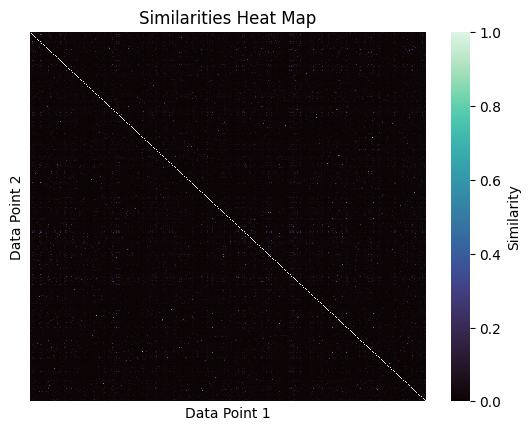

In [53]:
heatmap = sns.heatmap(similarities, cmap='mako', xticklabels=False, yticklabels=False)
cbar = heatmap.collections[0].colorbar
cbar.set_label('Similarity')

plt.xlabel('Data Point 1')
plt.ylabel('Data Point 2')
plt.title('Similarities Heat Map')
plt.show()

As I look at this, I can guess that k-means is the most suitable algorithm for clustering this kind of data.

So I went to the first cell and imported KMeans from sklearn.

Other suitable options would be:
- DBSCAN
- Hierarchical clustering (like dendograms)

We will try them as well to see which is the most suitable and performant

In [81]:
k = 3
clusterer = ClusterKmeans(similarities, k)

clusterer.clusters

{1: [0,
  1,
  2,
  4,
  8,
  9,
  11,
  12,
  14,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  24,
  25,
  28,
  29,
  30,
  31,
  32,
  34,
  35,
  36,
  37,
  39,
  40,
  41,
  42,
  47,
  48,
  49,
  50,
  51,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  88,
  89,
  90,
  91,
  92,
  93,
  95,
  96,
  98,
  99,
  100,
  101,
  102,
  105,
  106,
  107,
  108,
  110,
  111,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  151,
  153,
  155,
  156,
  157,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  177,
  178,
  179,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  189,
  190,
  19

# Truncated SVD
Using Truncated SVD to solve the dimensiality problem and show the clusters that we just created.

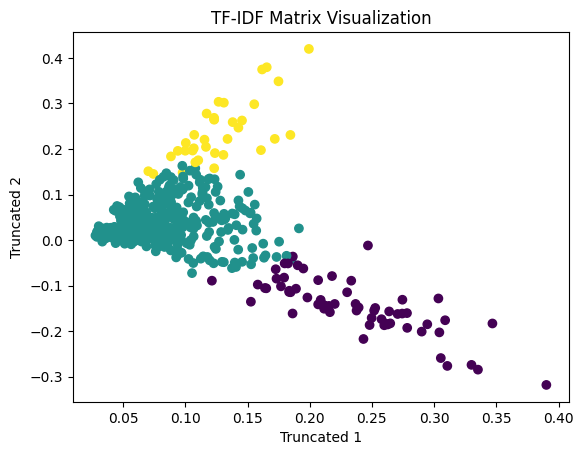

In [82]:
clf = TruncatedSVD(n_components=2)
tfidf_2d = clf.fit_transform(dp.matrix)
plt.scatter(tf], tfidf_2d[:, 1], c=clusterer.labels)
plt.xlabel('Truncated 1')
plt.ylabel('Truncated 2')
plt.title('TF-IDF Matrix Visualization')
plt.show()

# PCA
Converting the sparse matrix to a numpy matrix, then converting it to a numpy array for PCA to be able to reduce the components and dimensions

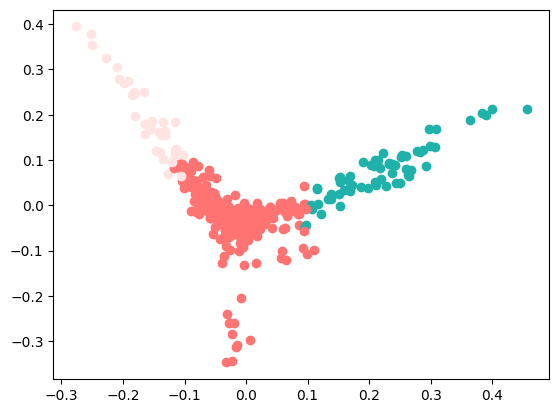

In [83]:
X = dp.matrix.todense()
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=2).fit_transform(np.asarray(X))

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[clusterer.labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()

# TSNE
Using  TSNE embedding to reduce dimensions

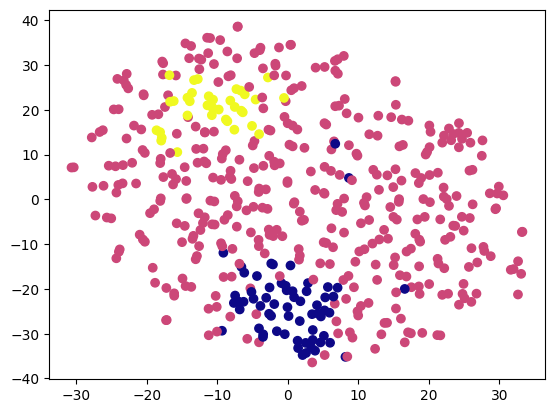

In [84]:
embeddings = TSNE(n_components=2, init="random")
Y = embeddings.fit_transform(dp.document_tfidfs)
plt.scatter(Y[:, 0], Y[:, 1], c=clusterer.labels, cmap="plasma")
plt.show()

# Problem
This solution using TF-IDF/Cosine similarity has a problem. Consider these sentences:

*My schoolmates are good lads*

*My collegemates are fine people*

These two senteces are very similar, but as the "are" is a common word, and its the only term that these two sentences share, the TF-IDF score would be pretty low for these terms.

# Solution
The solution is to use one of these algorithms
- LSA (Latent Semantic Analysis)
- Word Embedding (Word2Vec, Glove)
- ConceptNet

# Problem
Dimensionality when trying to draw the plot of the clusters

# Solution
[Dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) techniques like:

- ~~PCA~~
  - cannot be used with sparse matrix (our tf-idf)
- NMF
- Truncated SVD
  - [Visualize Spectral Decomposition | SEE Matrix, Chapter 2](https://www.youtube.com/watch?v=mhy-ZKSARxI)
  - [SVD Visualized, Singular Value Decomposition explained | SEE Matrix , Chapter 3](https://www.youtube.com/watch?v=vSczTbgc8Rc)
- TSNE

# Problem
We don't know how much n_clusters we have. 

# Solution
We should measure the performance of our clusters and choose the n_clusters based on that.

- Search in Google Scholar